# Récupérer de données sur une page web en utilisant beautiful Soup

In [4]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib
import bs4 #this is beautiful soup

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Telechargement de la page

In [5]:
url = "https://fr.wikipedia.org/wiki/Grenoble"
page = urllib.request.urlopen(url).read()

## Recuperation des valeurs dans la page wikipedia

In [6]:
# On tranforme le text en document BS
soup = bs4.BeautifulSoup(page)

# On ne recupere que les tableaux
table = soup.find_all('table')

# On ne recupere que les tableaux de la class wikitable centre
tableData = [tbl for tbl in table if not tbl.get('class') is None 
             if tbl.get('class') == ['wikitable','centre']]

# TODO On recupere le tableau qui a le mot meteo en caption
tableName = 'Comparaison des données météorologiques de Grenoble'
meteoData = [x for x in tableData if not x.caption is None][0]

# Recuperation des entetes de colonnede tableau
entetesC = meteoData.find('tr').find_all('th')
entetesC = [e.text for e in entetesC]
entetesC = [e.replace('\n','') for e in entetesC]

# Recupération des entetes de ligne
entetesL = meteoData.find_all('tr')[1:]
entetesL = [val.find('th').text for val in entetesL]

# Recuperation des valeurs
valeurs = meteoData.find_all('tr')[1:]
valeurs = [tr.find_all('td') for tr in valeurs]
valeurs = [[float(td.text.replace(' ','')) for td in lotd] for lotd in valeurs]

# Enregistrement au format python
df = pd.DataFrame(valeurs,index = entetesL,columns = entetesC[1:])

print(df)

/home/florimond/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['Ville', 'Ensoleillement (h/an)', 'Pluie (mm/an)', 'Neige (j/an)', 'Orage (j/an)', 'Brouillard (j/an)']
['Moyenne nationale', 'Grenoble (Aéroport Grenoble-Isère)', 'Paris', 'Nice', 'Strasbourg', 'Brest']
                                    Ensoleillement (h/an)  Pluie (mm/an)  Neige (j/an)  Orage (j/an)  Brouillard (j/an)
Moyenne nationale                                  1973.0          770.0          14.0          22.0               40.0
Grenoble (Aéroport Grenoble-Isère)                 2066.0          934.0          17.0          32.0               28.0
Paris                                              1661.0          637.0          12.0          18.0               10.0
Nice                                               2724.0          733.0           1.0          29.0                1.0
Strasbourg                                         1693.0          665.0          29.0          29.0               53.0
Brest                                              1605.0         1211.0   

# Quelques viz

In [7]:
df["Ensoleillement (h/an)"]

Moyenne nationale                     1973.0
Grenoble (Aéroport Grenoble-Isère)    2066.0
Paris                                 1661.0
Nice                                  2724.0
Strasbourg                            1693.0
Brest                                 1605.0
Name: Ensoleillement (h/an), dtype: float64

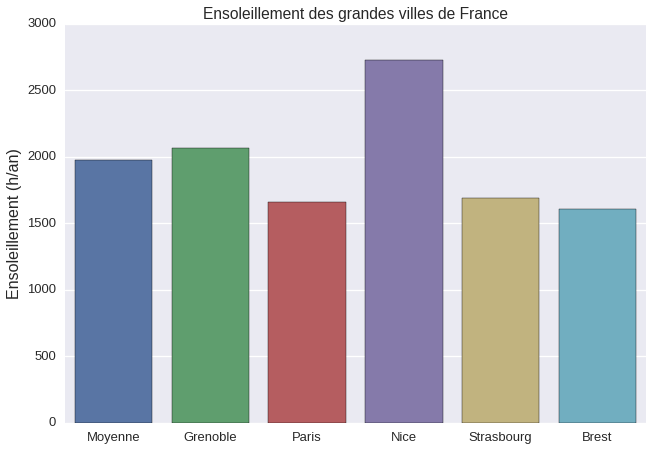

In [18]:
with sns.axes_style("darkgrid"):
    sns.barplot(x = ["Moyenne", "Grenoble","Paris","Nice","Strasbourg","Brest"],
                y="Ensoleillement (h/an)",data = df.reset_index())
    plt.title('Ensoleillement des grandes villes de France')
    plt.ylabel('Ensoleillement (h/an)', fontsize=16)

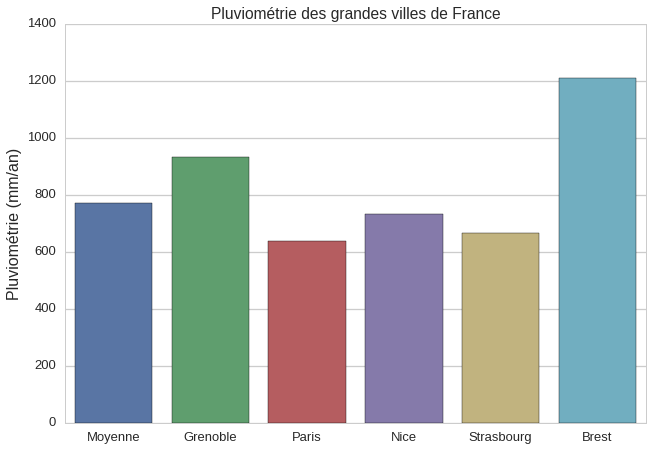

In [21]:
with sns.axes_style("whitegrid"):
    sns.barplot(x = ["Moyenne", "Grenoble","Paris","Nice","Strasbourg","Brest"],
                y="Pluie (mm/an)",data = df.reset_index())
    plt.title('Pluviométrie des grandes villes de France')
    plt.ylabel('Pluviométrie (mm/an)', fontsize=16)